# Code illustration for ageing of Ledgers with Credit Balances with General Ledger as Input.

## The input file is the excel file as exported from Quadra in its raw form. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Input Ledger report generated by Quadra
data = pd.read_excel("LedgerReportPeriodfrom01Apr.XLS",header=3)

WARNING *** file size (5570922) not 512 + multiple of sector size (512)


In [3]:
# set date upto which the ageing report has to be generated

import datetime

datetime_object = datetime.date(2020, 3, 31) #input date
print("Date of Ageing Report")
print(datetime_object)

Date of Ageing Report
2020-03-31


In [4]:
data.head()

,Account Name,Account Code,Voucher Date,Voucher No.,Project Name,Particulars,Debit (Rs.),Credit (Rs.),Balance (Rs.),Unnamed: 9
0,Salaries & Wages Payable,142120001,NaT,NaN,NaN,Opening Balance :,NaN,1911171.0,1911171.0,Cr
1,Salaries & Wages Payable,142120001,2016-04-04,SVBP/2016-2017/007,MANJEERA MALL,NaN,109274.0,NaN,1801897.0,Cr
2,Salaries & Wages Payable,142120001,2016-04-04,SVBP/2016-2017/008,MANJEERA MALL,NaN,758962.0,NaN,1042935.0,Cr
3,Salaries & Wages Payable,142120001,2016-04-06,SVBP/2016-2017/009,Head Office (Head Office - MRHPL),NaN,24570.0,NaN,1018365.0,Cr
4,Salaries & Wages Payable,142120001,2016-04-06,SVBP/2016-2017/009,MANJEERA TRINITY CORPORATE,NaN,10500.0,NaN,1007865.0,Cr


In [5]:
data.tail()

,Account Name,Account Code,Voucher Date,Voucher No.,Project Name,Particulars,Debit (Rs.),Credit (Rs.),Balance (Rs.),Unnamed: 9
22400,Sree Renuka Matha Milk Agency,142272310,2020-03-05 00:00:00,JP/MM/2019-2020/949,MANJEERA MALL,Being paid towards Office Expense Bill to Serv...,NaN,7.025000e+03,7025.0,Cr
22401,Sree Renuka Matha Milk Agency,142272310,2020-03-05 17:01:24,SVBP/MM/2019-2020/515,MANJEERA MALL,Being paid towards Purchase of Milk for Mall ...,7.025000e+03,NaN,NaN,NaN
22402,NaN,NaN,NaT,NaN,NaN,Total,1.697172e+09,1.712840e+09,NaN,NaN
22403,NaN,NaN,NaT,NaN,NaN,Closing Balance,NaN,1.566821e+07,NaN,NaN
22404,NaN,Bank Reconciliation Not Done,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.isnull().sum()

Account Name      3444
Account Code      3443
Voucher Date      3723
Voucher No.       3723
Project Name      3723
Particulars       1172
Debit (Rs.)      12341
Credit (Rs.)     10886
Balance (Rs.)     5808
Unnamed: 9        5808
dtype: int64

In [7]:
len(data)

22405

In [8]:
for i in range(len(data)):
  if data["Particulars"][i] == "Opening Balance :":
    data["Voucher Date"][i] = "2016-04-01"
  
  else:
    data["Voucher Date"][i] = data["Voucher Date"][i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [9]:
data.tail(2)

,Account Name,Account Code,Voucher Date,Voucher No.,Project Name,Particulars,Debit (Rs.),Credit (Rs.),Balance (Rs.),Unnamed: 9
22403,NaN,NaN,NaT,NaN,NaN,Closing Balance,NaN,15668210.72,NaN,NaN
22404,NaN,Bank Reconciliation Not Done,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data = data.fillna(0)

In [11]:
data.isnull().sum()


Account Name     0
Account Code     0
Voucher Date     0
Voucher No.      0
Project Name     0
Particulars      0
Debit (Rs.)      0
Credit (Rs.)     0
Balance (Rs.)    0
Unnamed: 9       0
dtype: int64

In [0]:
rows_drop = data[data['Voucher Date'] == 0].index.tolist()

In [0]:
data =data.drop(rows_drop)

In [14]:
data.head(20)

,Account Name,Account Code,Voucher Date,Voucher No.,Project Name,Particulars,Debit (Rs.),Credit (Rs.),Balance (Rs.),Unnamed: 9
0,Salaries & Wages Payable,142120001,2016-04-01,0,0,Opening Balance :,0.0,1911171.00,1911171.00,Cr
1,Salaries & Wages Payable,142120001,2016-04-04 00:00:00,SVBP/2016-2017/007,MANJEERA MALL,0,109274.0,0.00,1801897.00,Cr
2,Salaries & Wages Payable,142120001,2016-04-04 00:00:00,SVBP/2016-2017/008,MANJEERA MALL,0,758962.0,0.00,1042935.00,Cr
3,Salaries & Wages Payable,142120001,2016-04-06 00:00:00,SVBP/2016-2017/009,Head Office (Head Office - MRHPL),0,24570.0,0.00,1018365.00,Cr
4,Salaries & Wages Payable,142120001,2016-04-06 00:00:00,SVBP/2016-2017/009,MANJEERA TRINITY CORPORATE,0,10500.0,0.00,1007865.00,Cr
5,Salaries & Wages Payable,142120001,2016-04-06 00:00:00,SVBP/2016-2017/010,MANJEERA TRINITY CORPORATE,0,309685.0,0.00,698180.00,Cr
6,Salaries & Wages Payable,142120001,2016-04-06 00:00:00,SVBP/2016-2017/010,Head Office (Head Office - MRHPL),0,410564.0,0.00,287616.00,Cr
7,Salaries & Wages Payable,142120001,2016-04-06 00:00:00,SVBP/2016-2017/010,MANJEERA MAJESTIC HOMES,0,122029.0,0.00,165587.00,Cr
8,Salaries & Wages Payable,142120001,2016-04-06 00:00:00,SVBP/2016-2017/011,MANJEERA MALL,0,12707.0,0.00,152880.00,Cr
9,Salaries & Wages Payable,142120001,2016-04-06 00:00:00,SVBP/2016-2017/012,MANJEERA MALL,0,9000.0,0.00,143880.00,Cr


In [15]:
data.dtypes

Account Name      object
Account Code      object
Voucher Date      object
Voucher No.       object
Project Name      object
Particulars       object
Debit (Rs.)      float64
Credit (Rs.)     float64
Balance (Rs.)    float64
Unnamed: 9        object
dtype: object

In [0]:
data['Doc Date'] = pd.to_datetime(data['Voucher Date'], dayfirst=True)

data['month_year'] = pd.to_datetime(data['Doc Date']).dt.to_period('M')


In [17]:
data.head()

,Account Name,Account Code,Voucher Date,Voucher No.,Project Name,Particulars,Debit (Rs.),Credit (Rs.),Balance (Rs.),Unnamed: 9,Doc Date,month_year
0,Salaries & Wages Payable,142120001,2016-04-01,0,0,Opening Balance :,0.0,1911171.0,1911171.0,Cr,2016-04-01,2016-04
1,Salaries & Wages Payable,142120001,2016-04-04 00:00:00,SVBP/2016-2017/007,MANJEERA MALL,0,109274.0,0.0,1801897.0,Cr,2016-04-04,2016-04
2,Salaries & Wages Payable,142120001,2016-04-04 00:00:00,SVBP/2016-2017/008,MANJEERA MALL,0,758962.0,0.0,1042935.0,Cr,2016-04-04,2016-04
3,Salaries & Wages Payable,142120001,2016-04-06 00:00:00,SVBP/2016-2017/009,Head Office (Head Office - MRHPL),0,24570.0,0.0,1018365.0,Cr,2016-04-06,2016-04
4,Salaries & Wages Payable,142120001,2016-04-06 00:00:00,SVBP/2016-2017/009,MANJEERA TRINITY CORPORATE,0,10500.0,0.0,1007865.0,Cr,2016-04-06,2016-04


In [0]:
closing_cal = pd.DataFrame(data.groupby(['Account Code']).agg({"Debit (Rs.)": "sum"}))

In [0]:
closing_cal["Credit"] = pd.DataFrame(data.groupby(['Account Code']).agg({"Credit (Rs.)": "sum"}))['Credit (Rs.)']

In [0]:
closing_cal['Closing_Bal'] = closing_cal['Debit (Rs.)']-closing_cal['Credit']

In [21]:
closing_cal.head()

,Debit (Rs.),Credit,Closing_Bal
Account Code,,,
142120001,1.187523e+08,1.206191e+08,-1866868.45
142120013,1.621850e+05,5.865910e+05,-424406.00
142121125,2.237400e+05,2.237400e+05,0.00
142121126,7.701120e+05,7.701120e+05,0.00
142121127,5.067567e+07,4.833120e+07,2344476.49


In [0]:
closing_cal['AccountCode'] = closing_cal.index

In [23]:
print(closing_cal.tail().to_string())

              Debit (Rs.)   Credit  Closing_Bal  AccountCode
Account Code                                                
142272291         95627.0  95627.0          0.0    142272291
142272292         12000.0  12000.0          0.0    142272292
142272293         84886.0  84886.0          0.0    142272293
142272304         23750.0  23750.0          0.0    142272304
142272310          7025.0   7025.0          0.0    142272310


In [24]:
closing_cal['Credit_Bal'] = 0

for i in closing_cal.index:
  if closing_cal['Closing_Bal'][i] < 0:
    closing_cal['Credit_Bal'][i] = -(closing_cal['Debit (Rs.)'][i]-closing_cal['Credit'][i])
  else:
    closing_cal['Credit_Bal'][i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [25]:
closing_cal.head()

,Debit (Rs.),Credit,Closing_Bal,AccountCode,Credit_Bal
Account Code,,,,,
142120001,1.187523e+08,1.206191e+08,-1866868.45,142120001,1866868
142120013,1.621850e+05,5.865910e+05,-424406.00,142120013,424406
142121125,2.237400e+05,2.237400e+05,0.00,142121125,0
142121126,7.701120e+05,7.701120e+05,0.00,142121126,0
142121127,5.067567e+07,4.833120e+07,2344476.49,142121127,0


In [26]:
closing_cal[closing_cal.index == 142132328]

,Debit (Rs.),Credit,Closing_Bal,AccountCode,Credit_Bal
Account Code,,,,,
142132328,2808002.0,2938505.0,-130503.0,142132328,130503


In [27]:
closing_cal['Debit_Bal'] = 0
for i in closing_cal.index:
  if closing_cal['Closing_Bal'][i] < 0:
    closing_cal['Debit_Bal'][i] = 0
  else:
    closing_cal['Debit_Bal'][i] = closing_cal['Debit (Rs.)'][i]-closing_cal['Credit'][i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
closing_cal[closing_cal.index == 142132328]

,Debit (Rs.),Credit,Closing_Bal,AccountCode,Credit_Bal,Debit_Bal
Account Code,,,,,,
142132328,2808002.0,2938505.0,-130503.0,142132328,130503,0


In [29]:
data[data['Account Code'] == 142132328].drop(["Account Name","Project Name", "Particulars"], axis = 1).tail()

,Account Code,Voucher Date,Voucher No.,Debit (Rs.),Credit (Rs.),Balance (Rs.),Unnamed: 9,Doc Date,month_year
17892,142132328,2019-04-18 15:02:26,BP/HO/2019-2020/033,33463.0,0.0,96701.0,Cr,2019-04-18 15:02:26,2019-04
17893,142132328,2019-06-08 00:00:00,JV/HO/2019-2020/105,0.0,150614.0,247315.0,Cr,2019-06-08 00:00:00,2019-06
17894,142132328,2019-06-08 15:25:58,BP/HO/2019-2020/146,116812.0,0.0,130503.0,Cr,2019-06-08 15:25:58,2019-06
17895,142132328,2019-09-17 16:53:34,JV/HO/2019-2020/315,0.0,273047.0,403550.0,Cr,2019-09-17 16:53:34,2019-09
17896,142132328,2019-09-17 16:54:31,BP/HO/2019-2020/391,273047.0,0.0,130503.0,Cr,2019-09-17 16:54:31,2019-09


In [0]:
credit_balances = pd.DataFrame(closing_cal[closing_cal['Credit_Bal']>0])

In [31]:
credit_balances = pd.DataFrame(credit_balances["Credit_Bal"])
credit_balances

,Credit_Bal
Account Code,
142120001,1866868
142120013,424406
142121128,883723
142121136,5316
142131321,1648289
...,...
142272011,3
142272085,11000
142272132,294


In [0]:
data['Doc Date'] = pd.to_datetime(data['Doc Date']).dt.date

In [33]:
data.head()

,Account Name,Account Code,Voucher Date,Voucher No.,Project Name,Particulars,Debit (Rs.),Credit (Rs.),Balance (Rs.),Unnamed: 9,Doc Date,month_year
0,Salaries & Wages Payable,142120001,2016-04-01,0,0,Opening Balance :,0.0,1911171.0,1911171.0,Cr,2016-04-01,2016-04
1,Salaries & Wages Payable,142120001,2016-04-04 00:00:00,SVBP/2016-2017/007,MANJEERA MALL,0,109274.0,0.0,1801897.0,Cr,2016-04-04,2016-04
2,Salaries & Wages Payable,142120001,2016-04-04 00:00:00,SVBP/2016-2017/008,MANJEERA MALL,0,758962.0,0.0,1042935.0,Cr,2016-04-04,2016-04
3,Salaries & Wages Payable,142120001,2016-04-06 00:00:00,SVBP/2016-2017/009,Head Office (Head Office - MRHPL),0,24570.0,0.0,1018365.0,Cr,2016-04-06,2016-04
4,Salaries & Wages Payable,142120001,2016-04-06 00:00:00,SVBP/2016-2017/009,MANJEERA TRINITY CORPORATE,0,10500.0,0.0,1007865.0,Cr,2016-04-06,2016-04


In [0]:
data["Age"] = datetime_object - data["Doc Date"]
data['Age'] = data['Age'] / pd.to_timedelta(1, unit='D')

In [35]:
data.head()

,Account Name,Account Code,Voucher Date,Voucher No.,Project Name,Particulars,Debit (Rs.),Credit (Rs.),Balance (Rs.),Unnamed: 9,Doc Date,month_year,Age
0,Salaries & Wages Payable,142120001,2016-04-01,0,0,Opening Balance :,0.0,1911171.0,1911171.0,Cr,2016-04-01,2016-04,1460.0
1,Salaries & Wages Payable,142120001,2016-04-04 00:00:00,SVBP/2016-2017/007,MANJEERA MALL,0,109274.0,0.0,1801897.0,Cr,2016-04-04,2016-04,1457.0
2,Salaries & Wages Payable,142120001,2016-04-04 00:00:00,SVBP/2016-2017/008,MANJEERA MALL,0,758962.0,0.0,1042935.0,Cr,2016-04-04,2016-04,1457.0
3,Salaries & Wages Payable,142120001,2016-04-06 00:00:00,SVBP/2016-2017/009,Head Office (Head Office - MRHPL),0,24570.0,0.0,1018365.0,Cr,2016-04-06,2016-04,1455.0
4,Salaries & Wages Payable,142120001,2016-04-06 00:00:00,SVBP/2016-2017/009,MANJEERA TRINITY CORPORATE,0,10500.0,0.0,1007865.0,Cr,2016-04-06,2016-04,1455.0


In [36]:
data.dtypes

Account Name        object
Account Code        object
Voucher Date        object
Voucher No.         object
Project Name        object
Particulars         object
Debit (Rs.)        float64
Credit (Rs.)       float64
Balance (Rs.)      float64
Unnamed: 9          object
Doc Date            object
month_year       period[M]
Age                float64
dtype: object

In [0]:
ageing = []



for i in credit_balances.index:
  ageing_ledger = []
  TP = i
  ageing_ledger.append(i)
  a = min([credit_balances[credit_balances.index ==TP]['Credit_Bal'].iloc[0],data[(data['Account Code']==TP) & (data["Age"] <= 30)]["Credit (Rs.)"].sum()])
  ageing_ledger.append(a)
  b = (min([credit_balances[credit_balances.index ==TP]['Credit_Bal'].iloc[0] -a,data[(data['Account Code']==TP) & (data["Age"] >= (30+1)) & (data["Age"] <= (30+150))]["Credit (Rs.)"].sum()]))
  ageing_ledger.append(b)
  c = (min([credit_balances[credit_balances.index ==TP]['Credit_Bal'].iloc[0] -a - b,data[(data['Account Code']==TP) & (data["Age"] >= (30+150+1)) & (data["Age"] <= (365))]["Credit (Rs.)"].sum()]))
  ageing_ledger.append(c)
  d = (min([credit_balances[credit_balances.index ==TP]['Credit_Bal'].iloc[0] -a - b - c,data[(data['Account Code']==TP) & (data["Age"] >= (365+1)) & (data["Age"] <= (365+365))]["Credit (Rs.)"].sum()]))
  ageing_ledger.append(d)
  e = (min([credit_balances[credit_balances.index ==TP]['Credit_Bal'].iloc[0] -a - b - c - d,data[(data['Account Code']==TP) & (data["Age"] >= (365+365+1)) & (data["Age"] <= (365+365+365))]["Credit (Rs.)"].sum()]))
  ageing_ledger.append(e)
  f = (min([credit_balances[credit_balances.index ==TP]['Credit_Bal'].iloc[0] -a - b - c - d - e,data[(data['Account Code']==TP) & (data["Age"] >= (365+365+365+1))]["Credit (Rs.)"].sum()]))
  ageing_ledger.append(f)
  ageing_ledger.append((a+b+c+d+e+f))
  ageing.append(ageing_ledger)


In [38]:
ageing[0:5]

[[142120001, 1698968.0, 167900.0, 0.0, 0.0, 0.0, 0.0, 1866868.0],
 [142120013, 0.0, 0.0, 0.0, 0.0, 0.0, 424406.0, 424406.0],
 [142121128, 0.0, 883723.0, 0.0, 0.0, 0.0, 0.0, 883723.0],
 [142121136, 0.0, 5316.0, 0.0, 0.0, 0.0, 0.0, 5316.0],
 [142131321, 0.0, 0.0, 0.0, 0.0, 548291.0, 1099998.0, 1648289.0]]

In [0]:
ageing = pd.DataFrame(ageing)

In [40]:
ageing.columns = ["account code","0 to 30 days", "31 to 180 days", "181 to 365 days", "year to 2 years","2 years to 3 years", "> 3 years","balance"]

print("first five rows of ageing report:")

ageing.head()

first five rows of ageing report:


,account code,0 to 30 days,31 to 180 days,181 to 365 days,year to 2 years,2 years to 3 years,> 3 years,balance
0,142120001,1698968.0,167900.0,0.0,0.0,0.0,0.0,1866868.0
1,142120013,0.0,0.0,0.0,0.0,0.0,424406.0,424406.0
2,142121128,0.0,883723.0,0.0,0.0,0.0,0.0,883723.0
3,142121136,0.0,5316.0,0.0,0.0,0.0,0.0,5316.0
4,142131321,0.0,0.0,0.0,0.0,548291.0,1099998.0,1648289.0


In [41]:
ageing[ageing["account code"] == 142131824]

,account code,0 to 30 days,31 to 180 days,181 to 365 days,year to 2 years,2 years to 3 years,> 3 years,balance


In [42]:
print("number of ledgers for which ageing is done :" + str(ageing.shape[0]))

number of ledgers for which ageing is done :251


In [43]:
print("input general ledger dimensions is :")

print(data.shape)

input general ledger dimensions is :
(18961, 13)


**Frequency Distribution of Number of Ledgers in range of ageing with balance amount range as X-Axis and number of Ledgers in Y-Axis **

Period Ending on March 31,2020



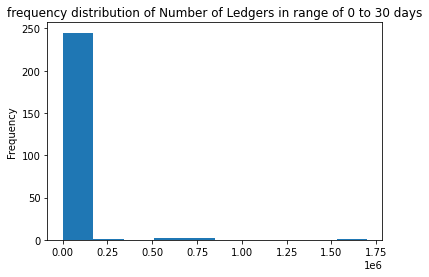

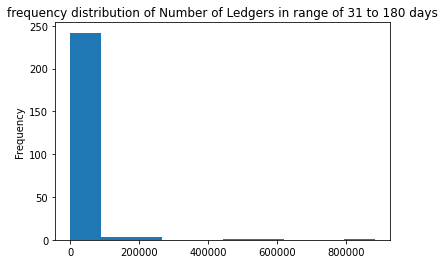

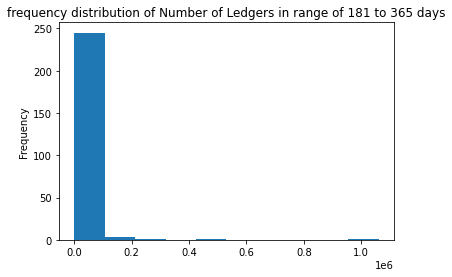

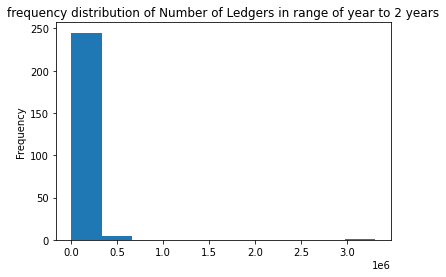

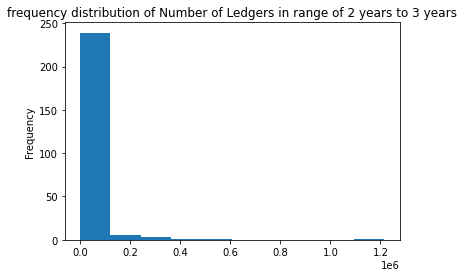

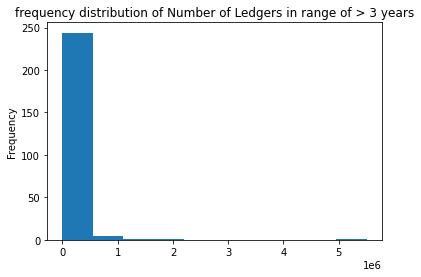

In [44]:
print("Period Ending on March 31,2020")
print("")

for i in ageing.columns[1:7]:
  ageing[i].plot(kind = 'hist')
  plt.title("frequency distribution of Number of Ledgers in range of " + str(i))
  plt.show()

In [0]:
ageing.index = ageing['account code']

In [46]:
ageing.iloc[:,1:7].T

account code,142120001,142120013,142121128,142121136,142131321,142131328,142131329,142131332,142131333,142131344,142131345,142131350,142131351,142131354,142131355,142131362,142131364,142131365,142131366,142131367,142131369,142131372,142131375,142131378,142131383,142131387,142131388,142131392,142131397,142131398,142131402,142131409,142131410,142131413,142131424,142131425,142131428,142131430,142131459,142131488,...,142271664,142271665,142271666,142271668,142271669,142271670,142271671,142271672,142271673,142271675,142271676,142271677,142271678,142271680,142271681,142271682,142271683,142271684,142271685,142271686,142271689,142271690,142271691,142271692,142271697,142271699,142271700,142271713,142271759,142271858,142271862,142271867,142271888,142271959,142271968,142272011,142272085,142272132,142272260,142272280
0 to 30 days,1698968.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,90000.0,0.0,3000.0,0.0,0.0,0.0,0.0,81000.0
31 to 180 days,167900.0,0.0,883723.0,5316.0,0.0,0.0,0.0,0.0,0.0,0.0,456568.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,166420.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,0.0,0.0,24676.0,2086.0,0.0,0.0,0.0,192.0,0.0,0.0,294.0,2470.0,0.0
181 to 365 days,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
year to 2 years,0.0,0.0,0.0,0.0,0.0,83893.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,470397.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75411.0,0.0,1177.0,177565.0,0.0,0.0,0.0,0.0,...,12924.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,9978.0,0.0,11284.0,0.0,0.0,11000.0,0.0,0.0,0.0
2 years to 3 years,0.0,0.0,0.0,0.0,548291.0,147112.0,130996.0,0.0,115706.0,0.0,0.0,0.0,0.0,0.0,0.0,97404.0,0.0,0.0,39000.0,0.0,0.0,196598.0,0.0,0.0,132417.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30000.0,0.0,0.0,0.0,13724.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18555.0,25000.0,0.0,0.0,0.0,9983.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
> 3 years,0.0,424406.0,0.0,0.0,1099998.0,0.0,0.0,14189.0,0.0,113500.0,0.0,303920.0,166201.0,38759.0,44204.0,0.0,11712.0,33176.0,0.0,357421.0,152128.0,0.0,17677.0,659348.0,0.0,289360.0,36100.0,52502.0,156363.0,0.0,18941.0,202755.0,0.0,0.0,0.0,0.0,47169.0,0.0,5936.0,45600.0,...,0.0,607.0,10500.0,203855.0,98000.0,525811.0,17423.0,32611.0,13500.0,5507697.0,307762.0,10584.0,61237.0,59382.0,295.0,45928.0,1500.0,55382.0,45928.0,80913.0,3232.0,297232.0,45928.0,61237.0,22050.0,29007.0,10595.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Bar Charts of Ledger Balances as per ageing**

Period Ending on March 31,2020



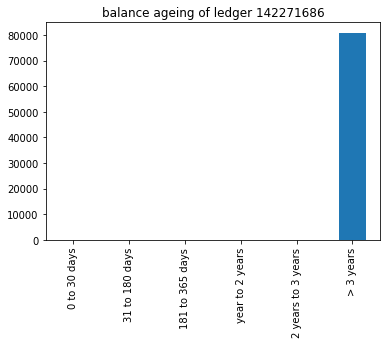

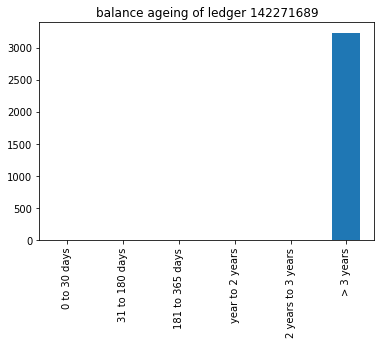

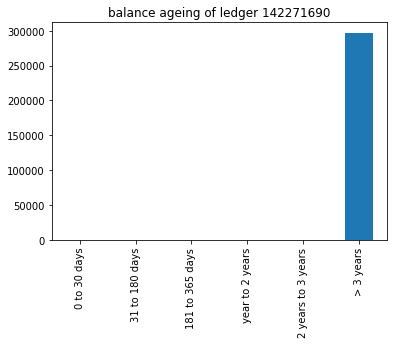

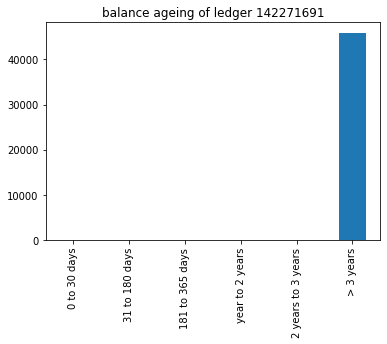

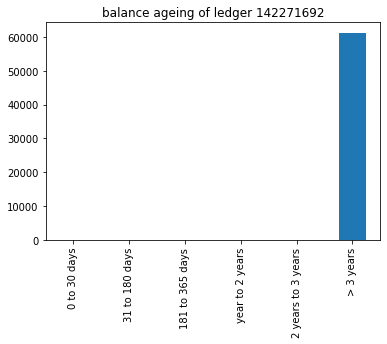

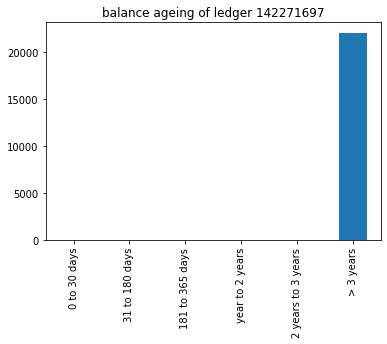

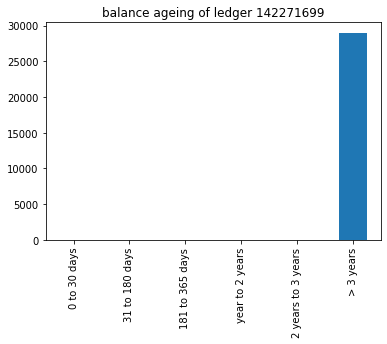

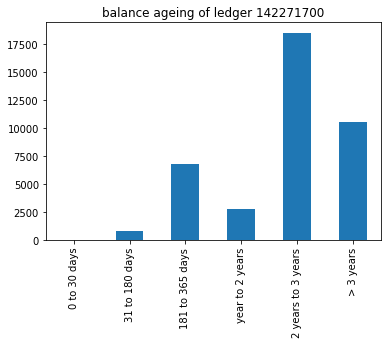

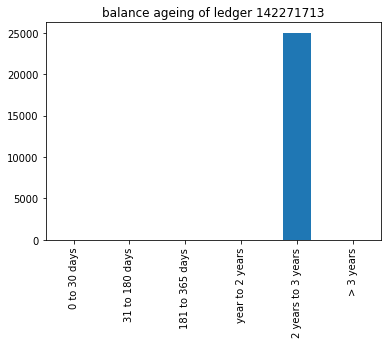

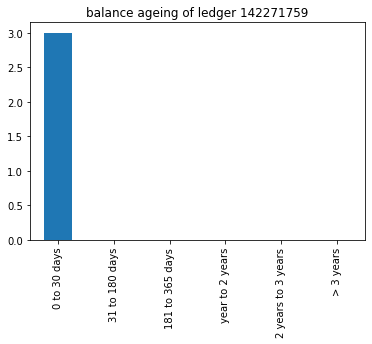

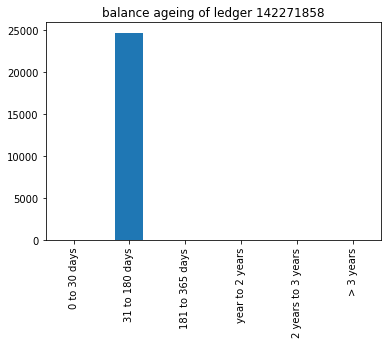

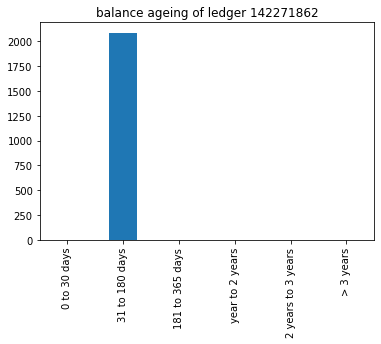

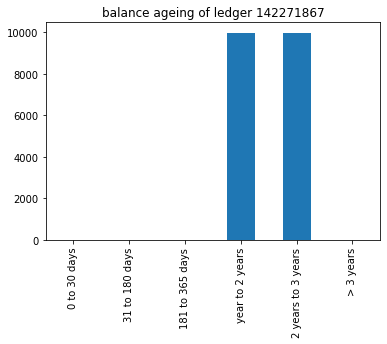

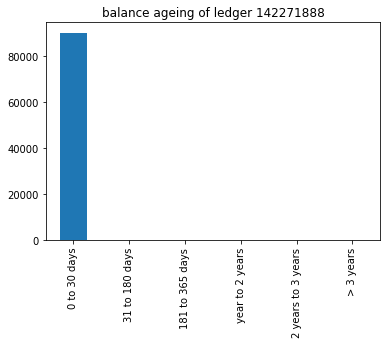

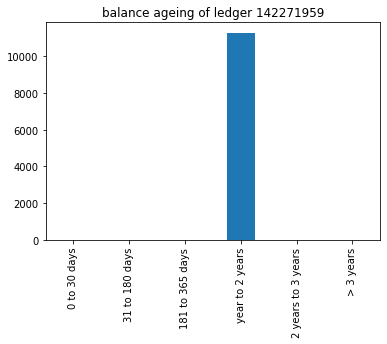

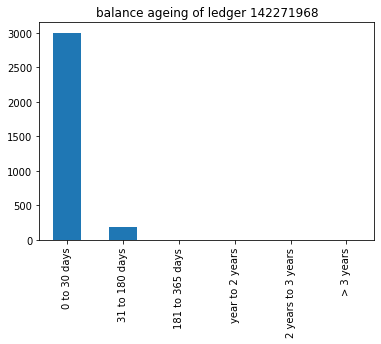

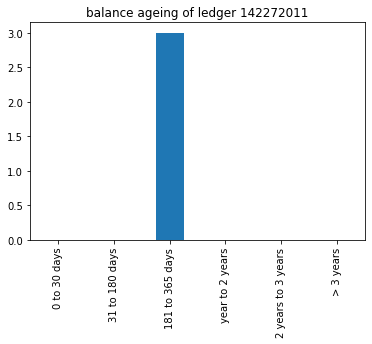

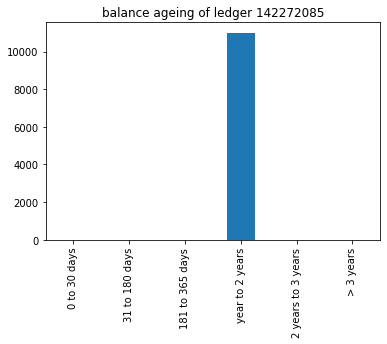

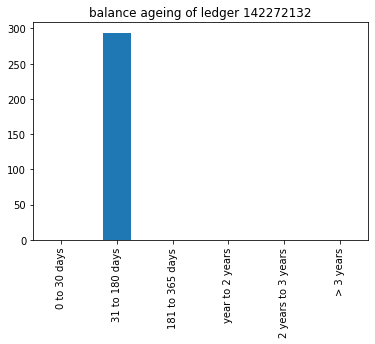

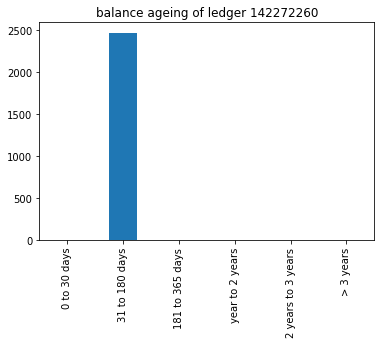

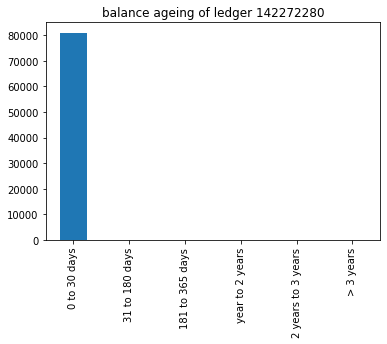

In [47]:
print("Period Ending on March 31,2020")
print("")

for i in ageing.iloc[:,1:7].T.columns[230:]:
  ageing.iloc[:,1:7].T[i].plot(kind = 'bar')
  plt.title("balance ageing of ledger " + str(i))
  plt.show()

In [48]:
ageing.sum()

account code          3.568947e+10
0 to 30 days          5.076763e+06
31 to 180 days        3.690359e+06
181 to 365 days       2.519513e+06
year to 2 years       7.608239e+06
2 years to 3 years    4.945113e+06
> 3 years             2.291250e+07
balance               4.675249e+07
dtype: float64

In [49]:
closing_cal.Credit_Bal.sum() - closing_cal.Debit_Bal.sum()

15668211

In [0]:
ageing.to_excel("ageing of TP.xlsx")

In [51]:
len(data["Account Name"].unique())

1108

In [52]:
len(data["Account Code"].unique())

1148

In [53]:
data.dtypes

Account Name        object
Account Code        object
Voucher Date        object
Voucher No.         object
Project Name        object
Particulars         object
Debit (Rs.)        float64
Credit (Rs.)       float64
Balance (Rs.)      float64
Unnamed: 9          object
Doc Date            object
month_year       period[M]
Age                float64
dtype: object

In [0]:
new = data["Voucher No."].str.split("/", n = 4, expand = True) 

In [55]:
new

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,SVBP,2016-2017,007,None
2,SVBP,2016-2017,008,None
3,SVBP,2016-2017,009,None
4,SVBP,2016-2017,009,None
...,...,...,...,...
22394,BP,HO,2019-2020,801
22395,CI,HO,2019-2020,235
22396,SVBP,HO,2019-2020,963
22400,JP,MM,2019-2020,949


In [56]:
print("Types of Voucher Entries:")
print("")
print((pd.DataFrame(new))[0].unique().tolist()[1:])

Types of Voucher Entries:

['SVBP', 'BR', 'JP', 'BP', 'JV', 'DN', 'CI', 'PI', 'SVPD', 'SVCD', 'CN', 'CR', 'CP']


In [57]:
data.shape

(18961, 13)

In [0]:
unique_ac_codes = pd.DataFrame(data['Account Code'].unique())
unique_ac_codes.columns = ["Account Code"]

In [59]:
unique_ac_codes

,Account Code
0,142120001
1,142131321
2,142131322
3,142131323
4,142221218
...,...
1143,142132723
1144,142132647
1145,142222448
1146,142132724


In [60]:
data[["Account Code","Account Name"]].merge(unique_ac_codes, on = "Account Code").drop_duplicates().head()

,Account Code,Account Name
0,142120001,Salaries & Wages Payable
1327,142131321,Arna Infrasolutions P Ltd
1340,142131322,Skidata India Pvt Ltd
1389,142131323,Hyderabad Fire System Services Pvt Ltd
1398,142221218,Patel Marketing


In [0]:
(data[["Account Code","Account Name"]].merge(unique_ac_codes, on = "Account Code").drop_duplicates()).to_excel("duplicate_ledger_names.xlsx")

***Bar Plots of Ledgers with respect to Debits during the month , credits during the month,incremental Credit Balance during the month and Closing balance at the end of each Month from April, 2016*** 

Period Ending on March 31,2020

Plots for analysis of Monthly Debits ,Credits and Month End Closing Balance of Legers with Credit Closing Balances In TP:



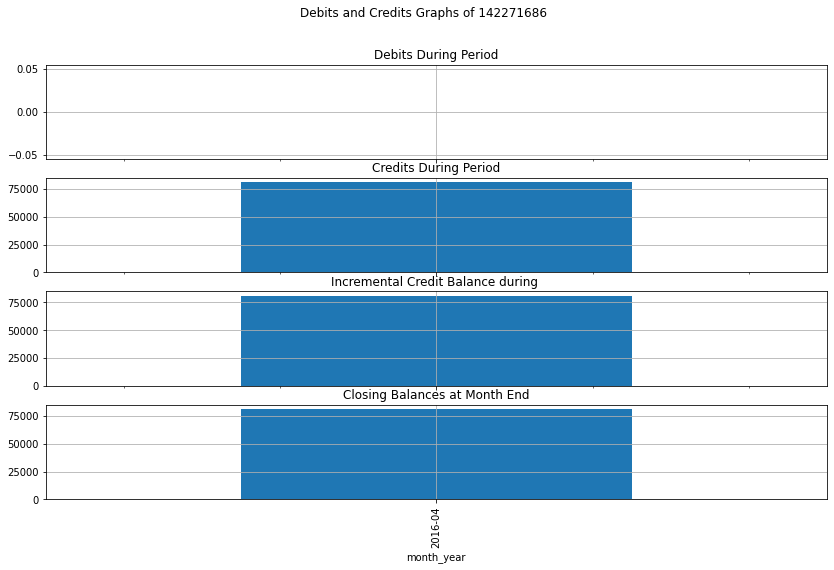

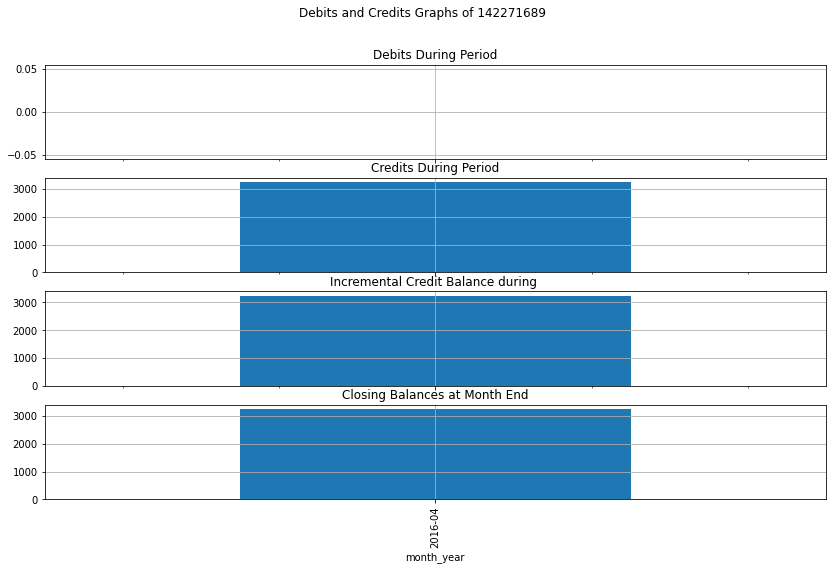

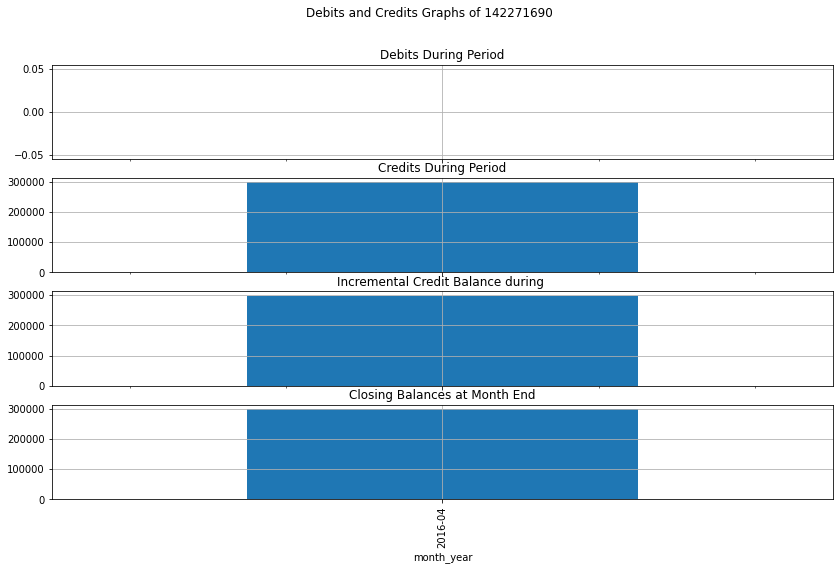

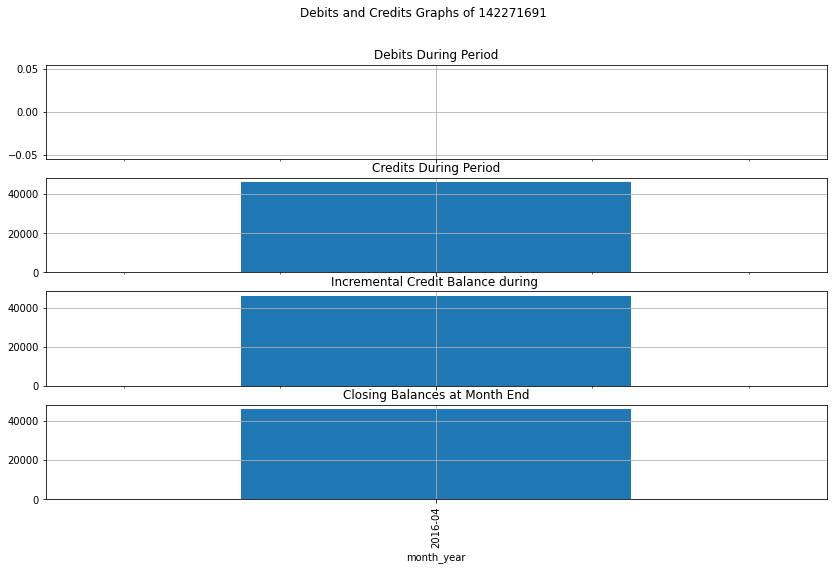

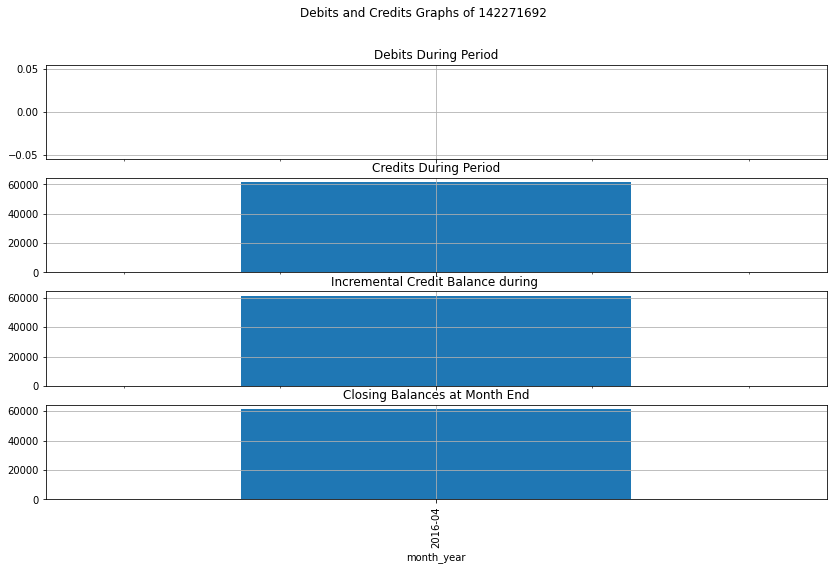

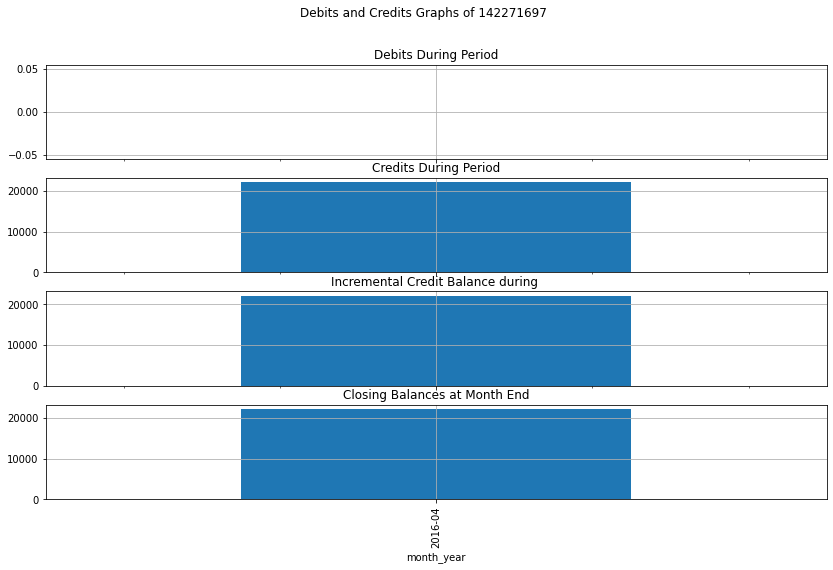

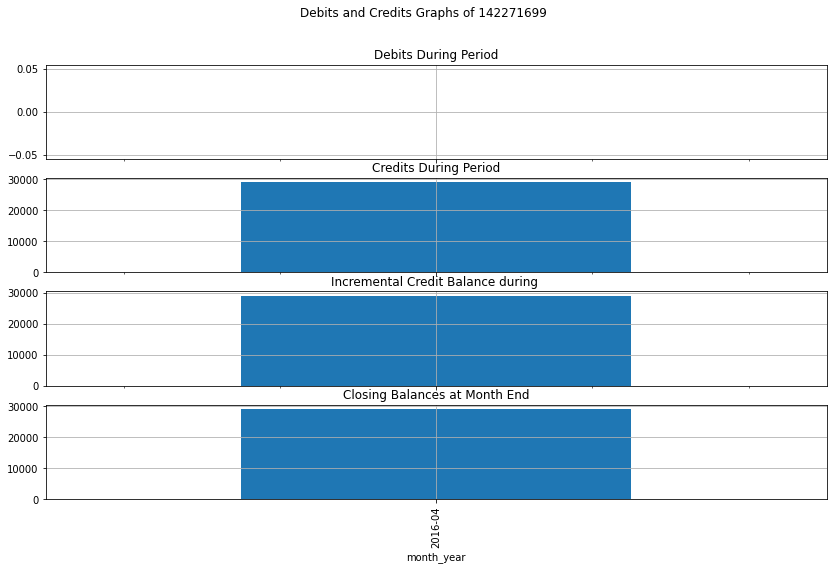

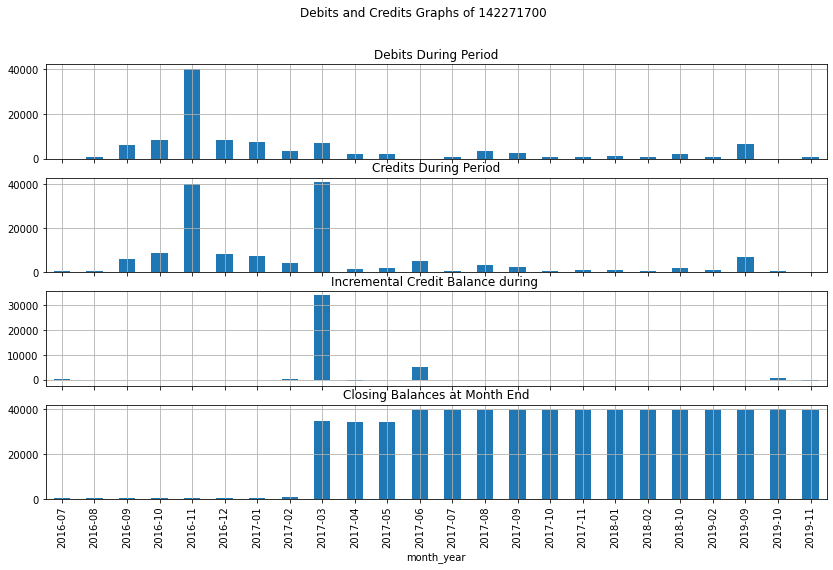

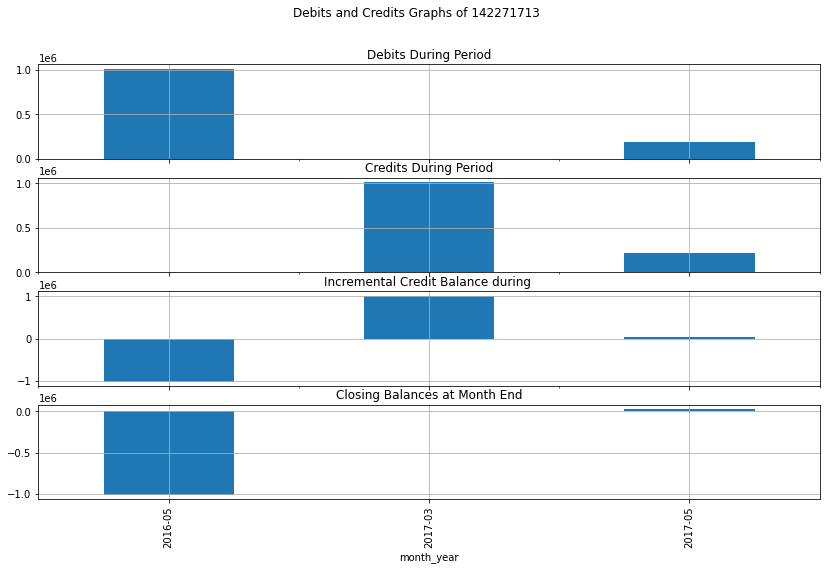

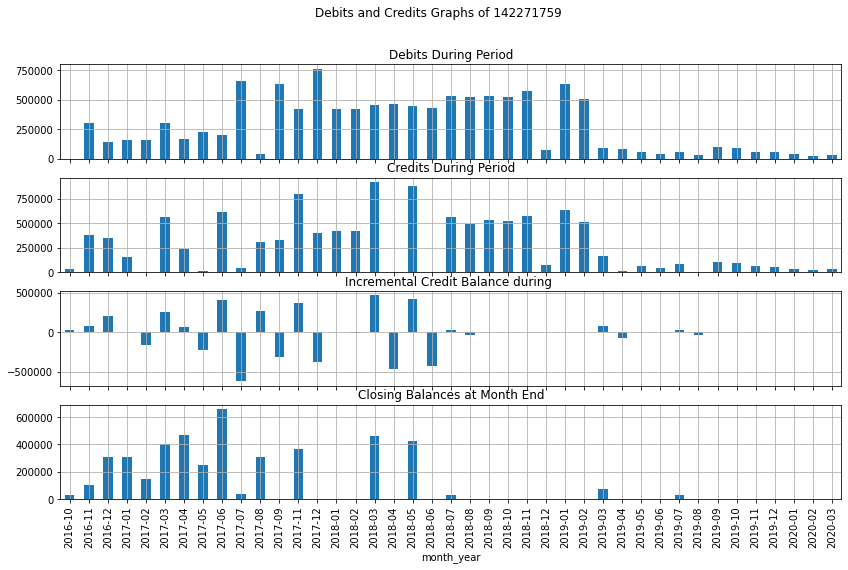

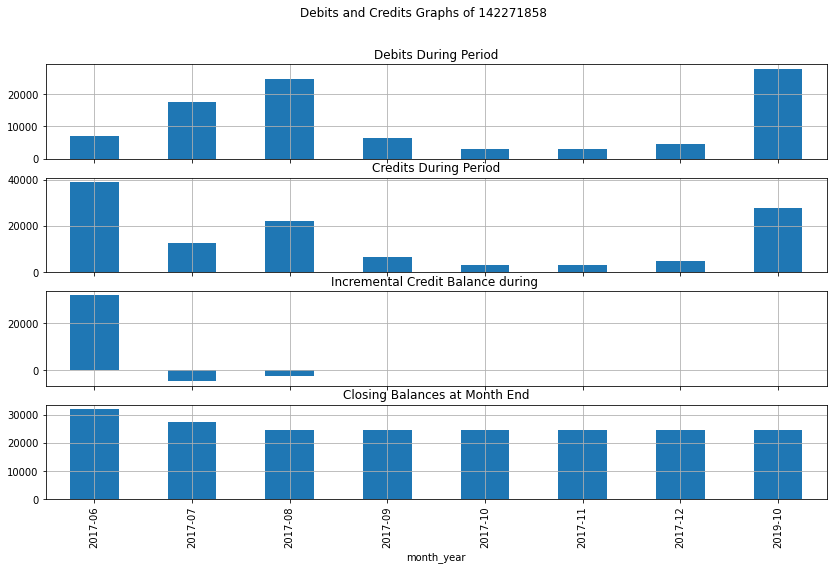

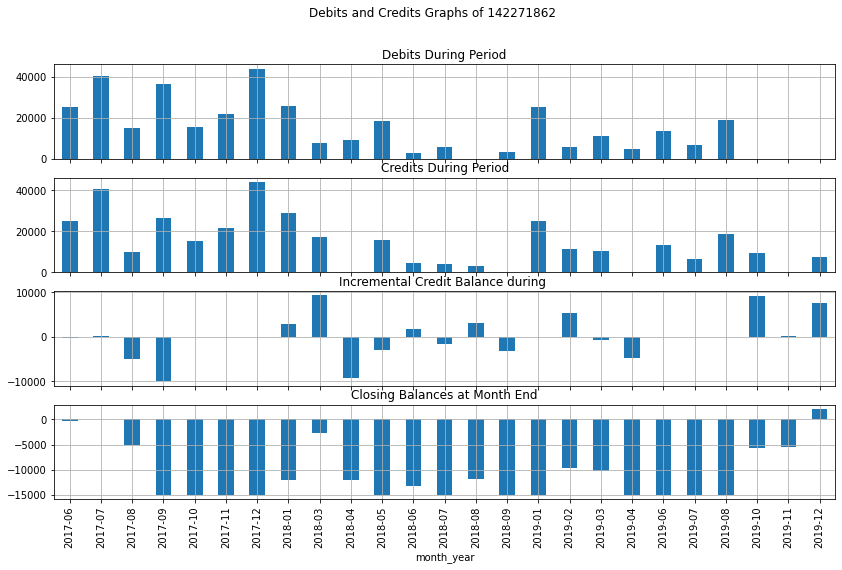

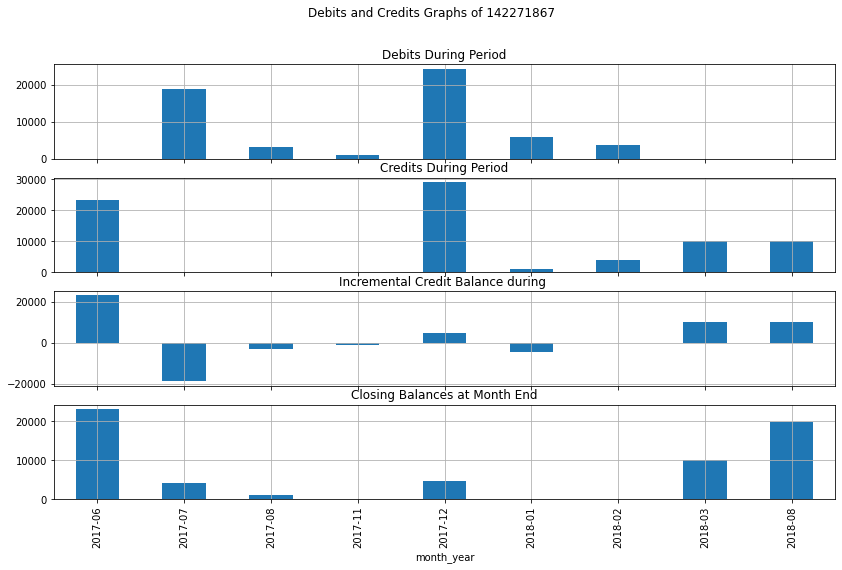

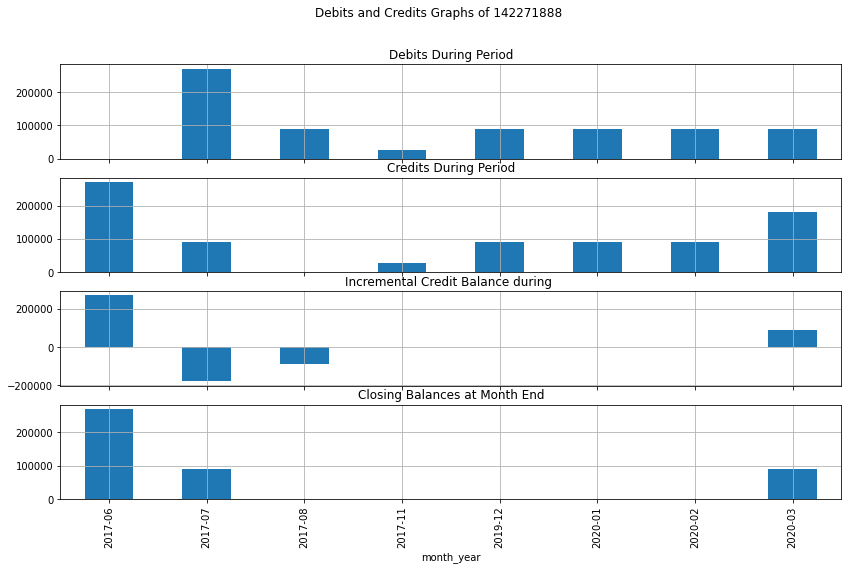

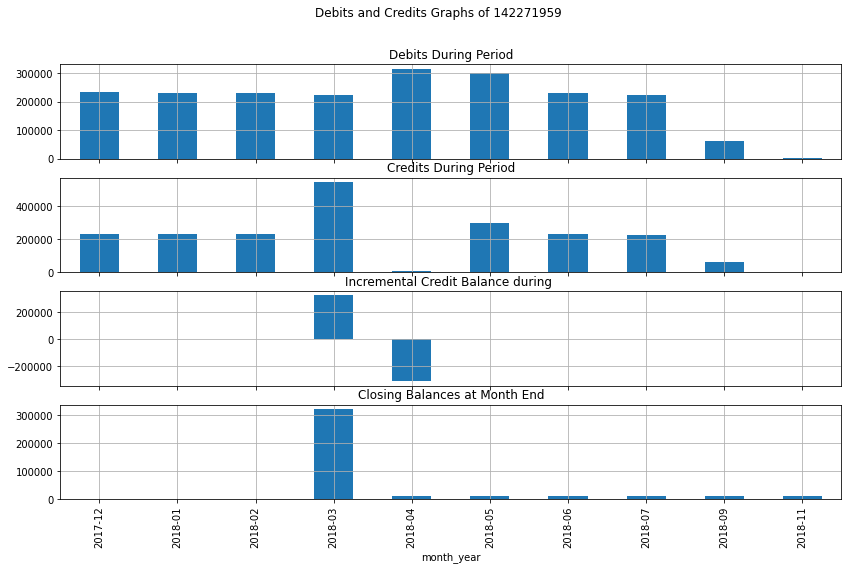

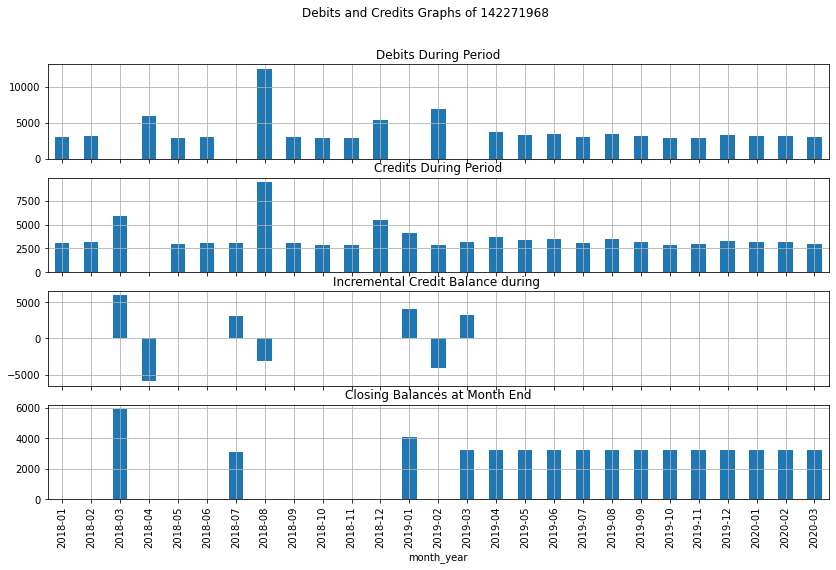

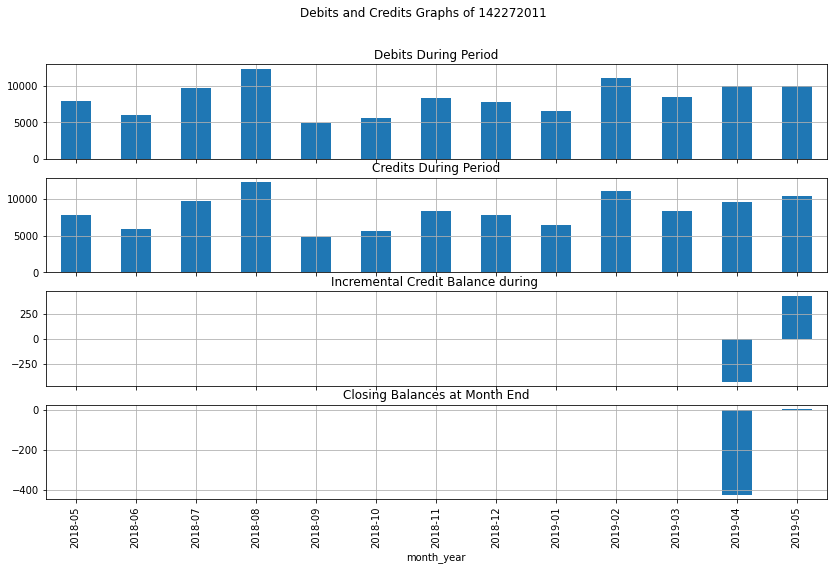

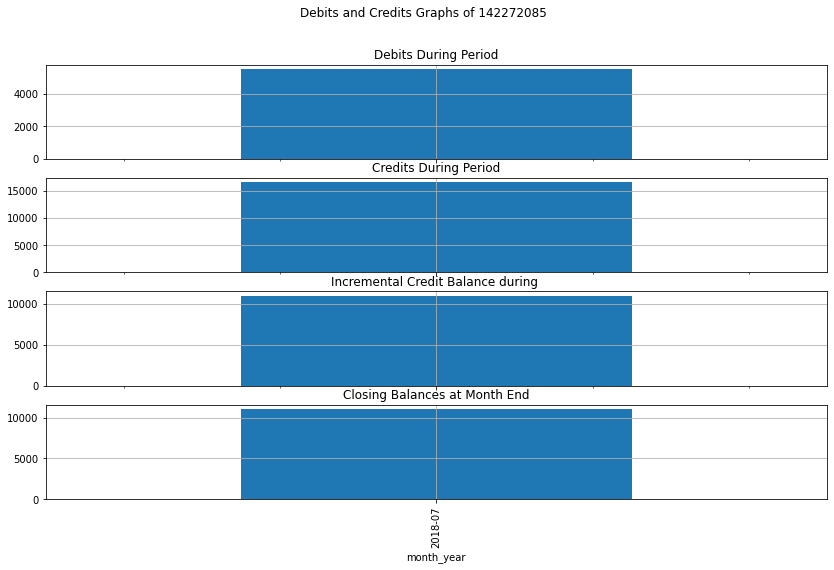

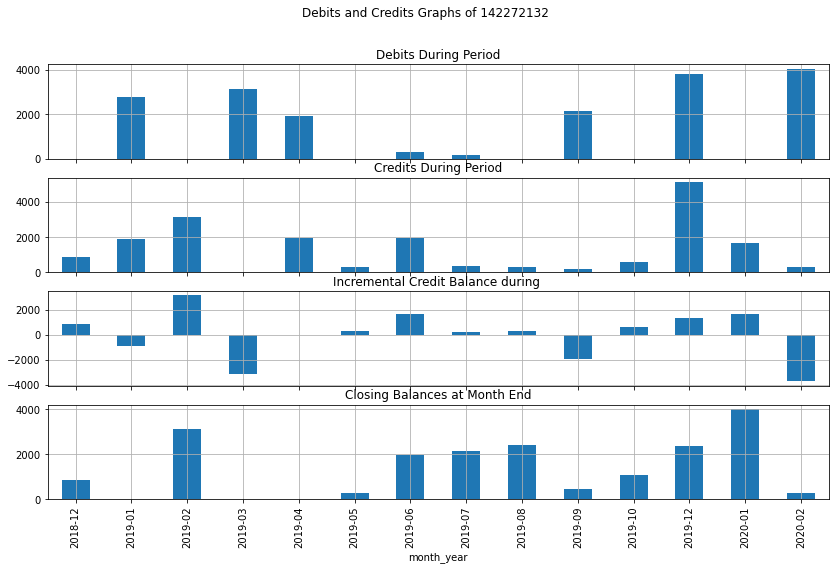

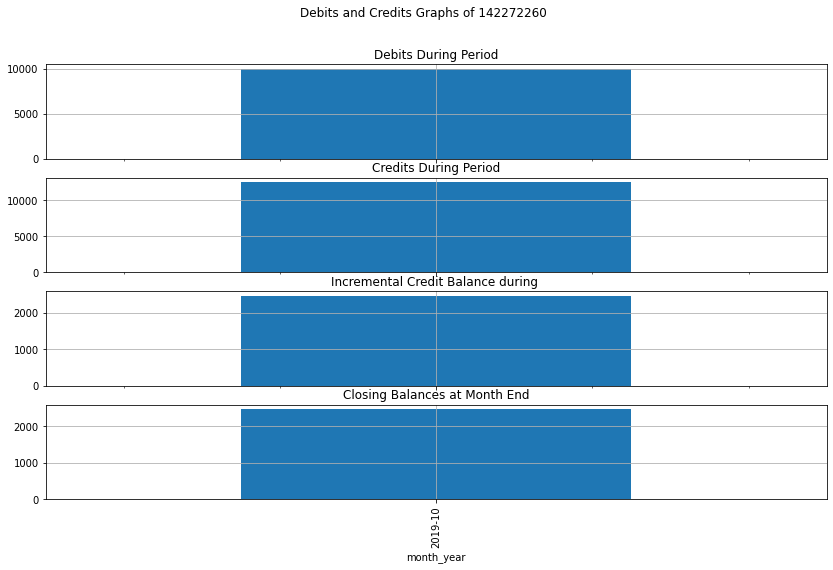

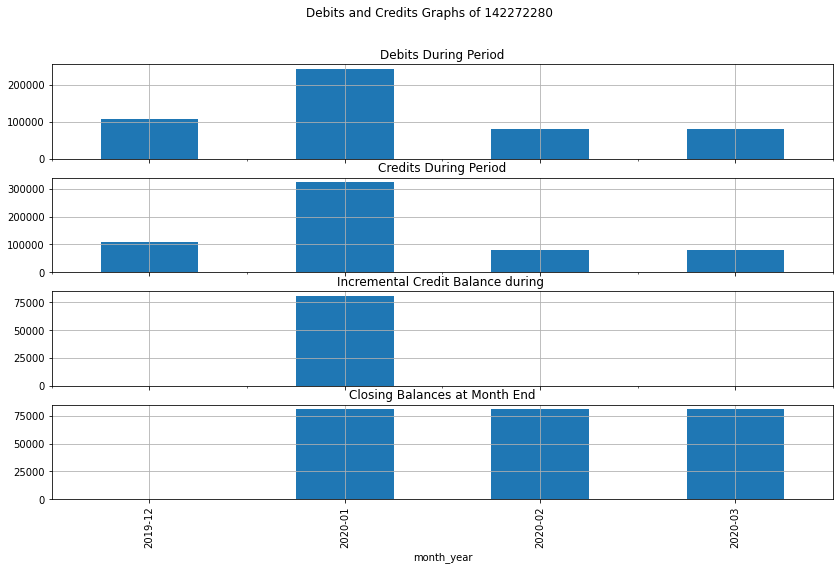

In [62]:
print("Period Ending on March 31,2020")
print("")
print("Plots for analysis of Monthly Debits ,Credits and Month End Closing Balance of Legers with Credit Closing Balances In TP:")
print("")

for i in ageing["account code"].unique().tolist()[230:]:

  plt.figure(figsize=(14,8))
  plt.suptitle("Debits and Credits Graphs of " + str(i))

  plt.subplot(4,1,1)
  plt.title("Debits During Period")
  data[data['Account Code']== i ].groupby(['month_year']).agg({"Debit (Rs.)": "sum"})['Debit (Rs.)'].plot(kind = 'bar')
  plt.grid()

  plt.subplot(4,1,2)
  plt.title("Credits During Period")
  data[data['Account Code']== i ].groupby(['month_year']).agg({"Credit (Rs.)": "sum"})['Credit (Rs.)'].plot(kind = 'bar', sharex=True)
  plt.grid()

  plt.subplot(4,1,3)
  plt.title("Incremental Credit Balance during ")
  (data[data['Account Code']== i ].groupby(['month_year']).agg({"Credit (Rs.)": "sum"})['Credit (Rs.)']-data[data['Account Code']== i ].groupby(['month_year']).agg({"Debit (Rs.)": "sum"})['Debit (Rs.)']).plot(kind = 'bar')
  plt.grid()

  plt.subplot(4,1,4)
  plt.title("Closing Balances at Month End")
  (pd.DataFrame(data[data['Account Code']== i ].groupby(['month_year']).agg({"Credit (Rs.)": "sum"})['Credit (Rs.)']-data[data['Account Code']== i ].groupby(['month_year']).agg({"Debit (Rs.)": "sum"})['Debit (Rs.)']))[0].cumsum(axis = 0).plot(kind = 'bar', sharex=True)
  plt.grid()
  
  plt.show()